In [72]:
import eli5
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB

In [22]:
data = pd.read_csv('rnn/data/single_step_df_ints_2022-01-11.csv', header=0)

In [23]:
data = pd.get_dummies(data, columns=['input'])

In [24]:
float_cols = data.select_dtypes(include=['float64']).columns
data.loc[:, float_cols] = data.loc[:, float_cols].fillna(-99)

In [44]:
data

,target,start_coords_x,start_coords_y,start_coords_z,coordinates_p.x,coordinates_p.y,coordinates_p.z,p.containment,p.food_k,p.strong_k,...,input_n,input_o,input_p,input_q,input_r,input_s,input_t,input_w,input_x,input_z
0,p,-0.451354,-0.413918,0.156247,0.008034,0.957082,0.689054,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,c,0.513000,-0.531000,0.740000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,...,0,1,0,0,0,0,0,0,0,0
2,g,0.513000,-0.531000,0.740000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,...,0,0,0,0,0,0,0,0,0,0
3,k,0.513000,-0.531000,0.740000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,...,0,0,0,0,0,0,0,0,0,0
4,r,0.513000,-0.531000,0.740000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,h,1.000000,3.000000,2.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,...,0,0,0,0,0,0,0,0,0,0
1268,s,0.000000,4.000000,1.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,...,0,0,0,0,0,0,0,0,0,0
1269,d,0.000000,4.000000,1.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,...,0,0,0,0,0,1,0,0,0,0
1270,g,0.000000,2.000000,2.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X = data.drop(['target'], axis=1)
y = data.target

In [65]:
split = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

for train_index, test_index in split.split(data, data['target']):
    X_train = data.loc[train_index].drop('target', axis=1)
    X_test = data.loc[test_index].drop('target', axis=1)
    y_train = data['target'].loc[train_index]
    y_test = data['target'].loc[test_index]

In [66]:
len(y_test.unique())

19

### Random Forest

In [55]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [68]:
cm = confusion_matrix(y_test, y_pred)

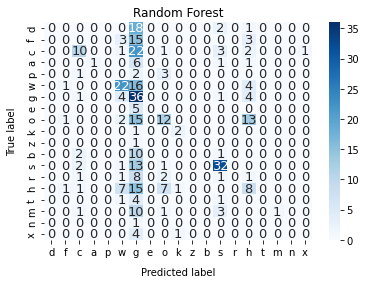

In [70]:
labels = [x for x in y_test.unique()]
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sn.heatmap(df_cm, annot=True, cmap='Blues', annot_kws={'size':13})
plt.ylabel('True label', labelpad=10)
plt.xlabel('Predicted label', labelpad=10)
plt.title('Random Forest')
plt.show()

In [73]:
eli5.explain_weights(rf, feature_names=list(X.columns))

Weight,Feature
0.0973 ± 0.1390,start_coords_x
0.0796 ± 0.2469,p.food_k
0.0683 ± 0.2221,p.mid_k
0.0664 ± 0.1984,coordinates_f.z
0.0633 ± 0.2022,k.containment
0.0540 ± 0.1666,start_coords_y
0.0430 ± 0.1558,coordinates_p.z
0.0422 ± 0.1621,input_<start>
0.0330 ± 0.1934,coordinates_p.y
0.0290 ± 0.1131,coordinates_k.x


### Naive Bayes

In [83]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

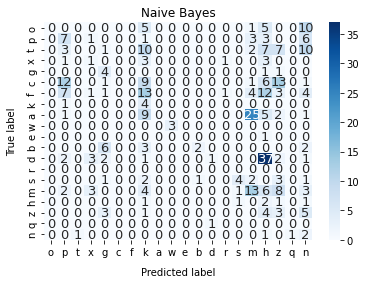

In [84]:
labels = [x for x in y_train.unique()]
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sn.heatmap(df_cm, annot=True, cmap='Blues', annot_kws={'size':13})
plt.ylabel('True label', labelpad=10)
plt.xlabel('Predicted label', labelpad=10)
plt.title('Naive Bayes')
plt.show()

### Logistic Regression

In [96]:
lr = LogisticRegression(penalty='l2', random_state=42, solver='newton-cg', 
                        multi_class='multinomial', max_iter=4000)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

/home/zauri/files/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
